# Dataquest - Visualising Earnings Based on College Majors 

This dataset contains information about american students who gratuaded college between 2010 and 2012. I will explore the relationships between major, gender and earnings after graduation.

The original data was released by American Community Survey. FiveThirtyEight cleaned the dataset and released it on their Github repo.

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix

In [67]:
recent_grads = pd.read_csv("recent-grads.csv")

In [63]:
# exploring the dataframe

In [68]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [5]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [6]:
recent_grads.columns

Index(['Rank', 'Major_code', 'Major', 'Total', 'Men', 'Women',
       'Major_category', 'ShareWomen', 'Sample_size', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'Median', 'P25th', 'P75th', 'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs'],
      dtype='object')

In [69]:
recent_grads.describe()


,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [70]:
# Drop rows with missing values - creating new variable to compare after using dropna
raw_data_count = recent_grads.shape
raw_data_count

(173, 21)

In [71]:
# Checking what rows have null values
recent_grads.isnull().sum()

Rank                    0
Major_code              0
Major                   0
Total                   1
Men                     1
Women                   1
Major_category          0
ShareWomen              1
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64

In [72]:
recent_grads = recent_grads.dropna()

In [73]:
cleaned_data_count = recent_grads.shape
cleaned_data_count

(172, 21)

In [74]:
recent_grads.isnull().sum()

Rank                    0
Major_code              0
Major                   0
Total                   0
Men                     0
Women                   0
Major_category          0
ShareWomen              0
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64

Is there a relationship between popular majors and earnings?

In [75]:
# What are the 10 most popular majors? (number of students per major)
popular_majors=recent_grads[["Major","Total","Median"]].sort_values(by=["Total"],ascending = False).head(10)

In [76]:
popular_majors

,Major,Total,Median
145,PSYCHOLOGY,393735.0,31500
76,BUSINESS MANAGEMENT AND ADMINISTRATION,329927.0,38000
123,BIOLOGY,280709.0,33400
57,GENERAL BUSINESS,234590.0,40000
93,COMMUNICATIONS,213996.0,35000
34,NURSING,209394.0,48000
77,MARKETING AND MARKETING RESEARCH,205211.0,38000
40,ACCOUNTING,198633.0,45000
137,ENGLISH LANGUAGE AND LITERATURE,194673.0,32000
78,POLITICAL SCIENCE AND GOVERNMENT,182621.0,38000


In [77]:
non_popular_majors = recent_grads[["Major","Total","Median"]].sort_values(by=["Total"],ascending = False).tail(10)

In [78]:
non_popular_majors

,Major,Total,Median
19,COURT REPORTING,1148.0,54000
172,LIBRARY SCIENCE,1098.0,22000
2,METALLURGICAL ENGINEERING,856.0,73000
55,SCHOOL STUDENT COUNSELING,818.0,41000
120,EDUCATIONAL ADMINISTRATION AND SUPERVISION,804.0,34000
1,MINING AND MINERAL ENGINEERING,756.0,75000
33,GEOLOGICAL AND GEOPHYSICAL ENGINEERING,720.0,50000
112,SOIL SCIENCE,685.0,35000
52,MATHEMATICS AND COMPUTER SCIENCE,609.0,42000
73,MILITARY TECHNOLOGIES,124.0,40000


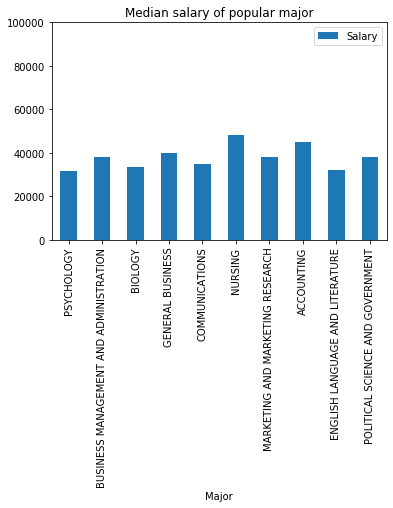

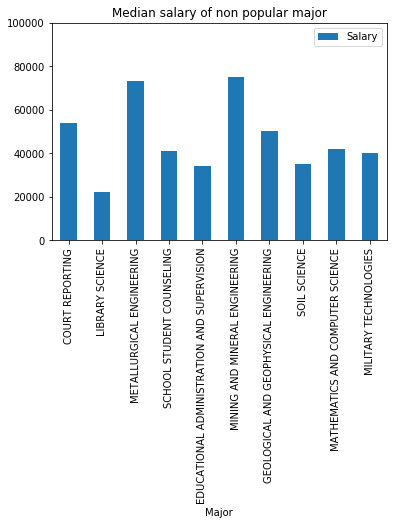

In [79]:
popular_majors.plot(x="Major", y="Median", kind="bar", title="Median salary of popular major", ylim=(0,100000),label="Salary")
non_popular_majors.plot(x="Major", y="Median", kind="bar", title="Median salary of non popular major", ylim=(0,100000),label="Salary")






-> Non Popular majors like mining and mineral engineering or metallurgical engineering lead to higher salaries when compared with the most popular majors like pyschology.


Do students that majored in subjects that were majority female make more money ?

Text(0, 0.5, 'Share of women in major')

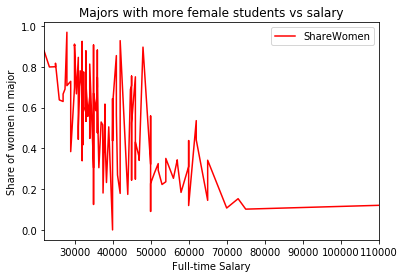

In [80]:
ax = recent_grads.plot(x="Median", y="ShareWomen",kind="line",title="Majors with more female students vs salary", color="red", )
ax.set_xlabel("Full-time Salary")
ax.set_ylabel("Share of women in major")





The highest the share of women in a major, the more likely she is to have a lower salary once finishing the course.

Do full time students have higher median salaries?

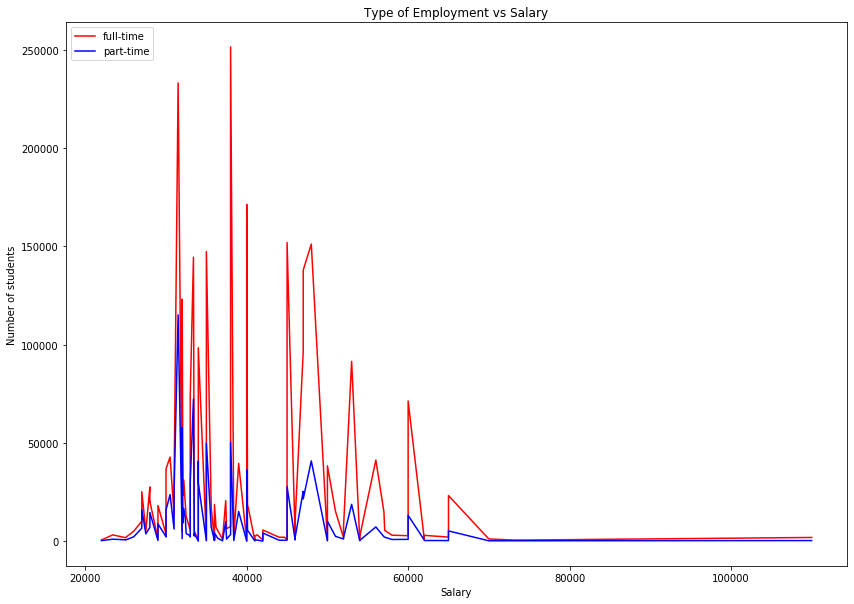

In [81]:
fig = plt.figure(figsize=(14,10))
plt.plot(recent_grads["Median"],recent_grads["Full_time"], color="red", label="full-time")
plt.plot(recent_grads["Median"],recent_grads["Part_time"], color="blue", label="part-time")
plt.legend(loc="upper left")
plt.title("Type of Employment vs Salary")
plt.xlabel("Salary")
plt.ylabel("Number of students")

plt.show()




Full time students have the highest median salaries. However, part time salaries seem to follow the same trend.

In [ ]:
# What percentage of majors are predominantly male? Predominantly female?

(0, 30)

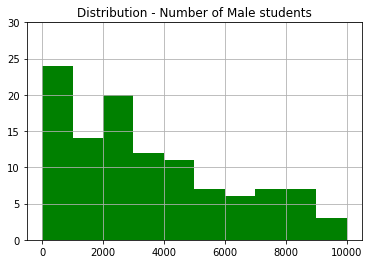

In [82]:
ax3 = recent_grads["Men"].hist(bins=10, facecolor="green", range=(0,10000))
ax3.set_title("Distribution - Number of Male students")
ax3.set_ylim(0,30)



The majority of majors have around 1000 men, followed by majors with 2000 to 3000 male students

Text(0.5, 1.0, 'Distribution of female students')

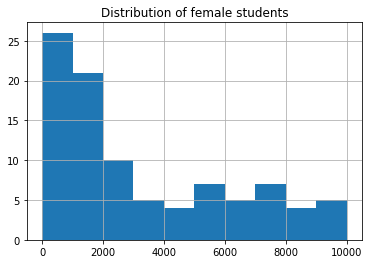

In [83]:
recent_grads["Women"].hist(bins=10,range=(0,10000)).set_title("Distribution of female students")


approximately 45% of majors have less than 2000 female students

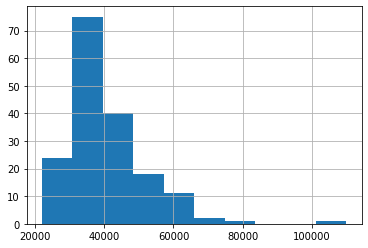

In [84]:
# What's the most common median salary range? 
recent_grads["Median"].hist()

The most common salary range is between 30K and 40K.

In [85]:
# What is the most common salary range for women vs for men

Text(0, 0.5, 'Number graduates')

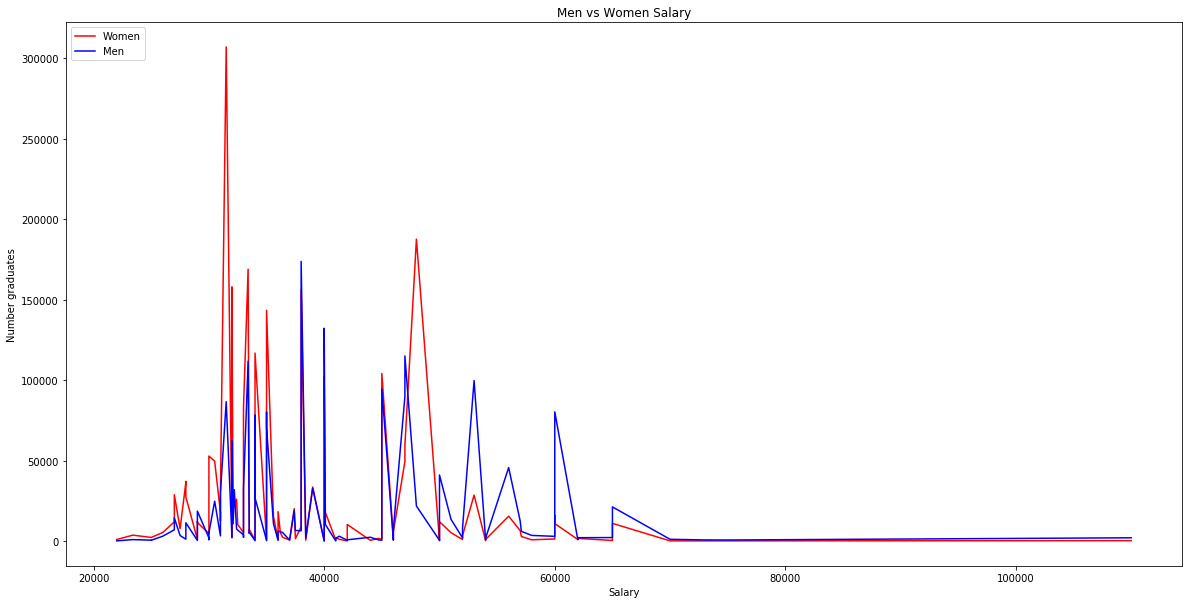

In [86]:
fig = plt.figure(figsize=(20,10))
plt.plot(recent_grads["Median"],recent_grads["Women"], color="red", label="Women")
plt.plot(recent_grads["Median"],recent_grads["Men"], color="blue", label="Men")
plt.legend(loc="upper left")
plt.title("Men vs Women Salary")
plt.xlabel("Salary")
plt.ylabel("Number graduates")

Men's salaries are more distributed and higher.